In [1]:
import numpy as np
import matplotlib.pyplot as plt

The one-dimensional advection diffusion equation is given by

$$
\frac{\partial u}{\partial t} = D \frac{\partial^2u}{\partial x^2} - \mu \frac{\partial u}{\partial x}
$$

Applying the IC

$$
u(x,0)=\sin(\pi x),
$$

we have the solution

$$
u(x,t) = \sin \left( \pi(x-\mu t) \right) \exp(-D\pi^2t)
$$

In [2]:
# Get the solution over x (range of vals in [0,1]), at time t, wave speed c
def get_solution(x, t, D, mu):
    sol = np.sin(np.pi*(x - mu*t)) * np.exp(-D*(np.pi**2)*t)
    return sol

# Plot the solution(s) at time(s) t
def plot_solution(x, t, D, mu):
    fig, ax = plt.subplots(figsize=(10,7))
    try:
        for t_i in t:
            sol = get_solution(x, t_i, D, mu)
            ax.plot(x, sol, label=f"t={t_i:.3f}")
            ax.set_xlabel("$x$")
            ax.set_ylabel("$u(x,t)$")
            ax.set_title("Analytical solutions to advection-diffusion equation")
        ax.legend()
    except:
        sol = get_solution(x, t, D, mu)
        ax.plot(x, sol)
        ax.set_xlabel("$x$")
        ax.set_ylabel("$u(x,t)$")
        ax.set_title(f"Analytical solution to advection-diffusion equation at t={t}")
    plt.show()

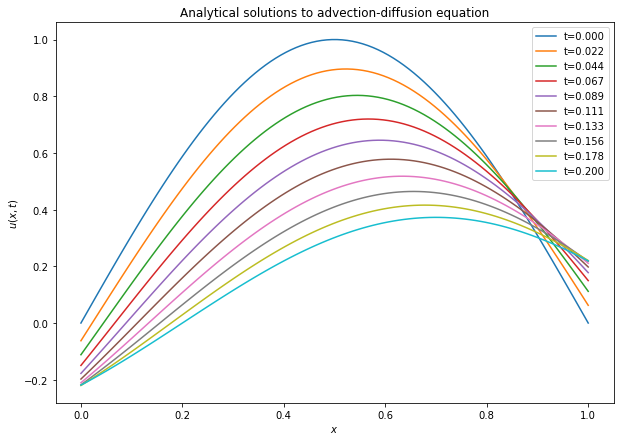

In [3]:
# Specify parameters
x = np.linspace(0,1,100)
D = 0.5
mu = 1
t = np.linspace(0,0.2,10)

# Plot the solutions
plot_solution(x, t, D, mu)

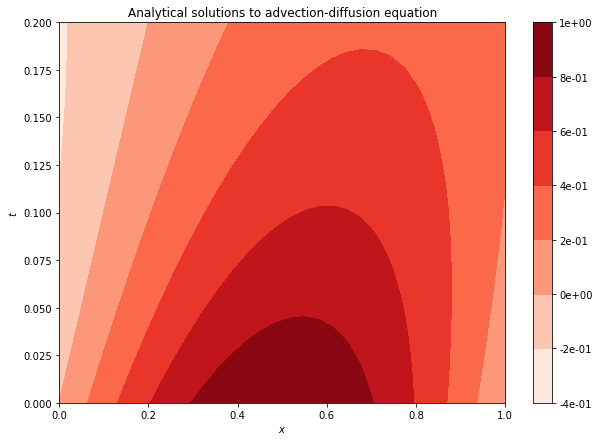

In [4]:
# Create PDE contour plot
x = np.linspace(0,1,32)
D = 0.5
mu = 1
t = np.linspace(0,0.2,32)
xx, tt = np.meshgrid(x, t)
sol = get_solution(xx, tt, D, mu)
fig, ax = plt.subplots(figsize=(10,7))
cf = ax.contourf(xx, tt, sol, cmap="Reds")
cb = fig.colorbar(cf, format='%.0e', ax=ax)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
ax.set_title("Analytical solutions to advection-diffusion equation")
plt.show()

In [5]:
# https://www.nature.com/articles/s41598-020-63982-w

# Get the solution over x (range of vals in [0,1]), at time t, wave speed c
def get_solution(x, t, phi0, phi1, mu0, kappa, lam, alpha):
    rhs1 = ((phi0 * np.sinh(alpha*(1-x)) + phi1*np.exp(-lam)*np.sinh(alpha*x))/(np.sinh(alpha)))*np.exp(lam*x)*(1-np.exp(-t*alpha**2))
    rhs2 = -((mu0*np.sinh(lam*(1-x)) + mu0*np.exp(-lam)*np.sinh(lam*x))/(np.sinh(lam)))*np.exp(lam*x)*(1-np.exp(-t*lam**2))
    rhs3 = mu0*np.exp(-t*alpha**2)
    sol = rhs1 + rhs2 + rhs3
    return sol

# Plot the solution(s) at time(s) t
def plot_solution(x, t, phi0, phi1, mu0, kappa, lam, alpha):
    fig, ax = plt.subplots(figsize=(10,7))
    try:
        for t_i in t:
            sol = get_solution(x, t_i, phi0, phi1, mu0, kappa, lam, alpha)
            ax.plot(x, sol, label=f"t={t_i:.3f}")
            ax.set_xlabel("$x$")
            ax.set_ylabel("$u(x,t)$")
            ax.set_title("Analytical solutions to advection-diffusion-reaction equation")
        ax.legend()
    except:
        sol = get_solution(x, t, phi0, phi1, mu0, kappa, lam, alpha)
        ax.plot(x, sol)
        ax.set_xlabel("$x$")
        ax.set_ylabel("$u(x,t)$")
        ax.set_title(f"Analytical solution to advection-diffusion-reaction equation at t={t}")
    plt.show()

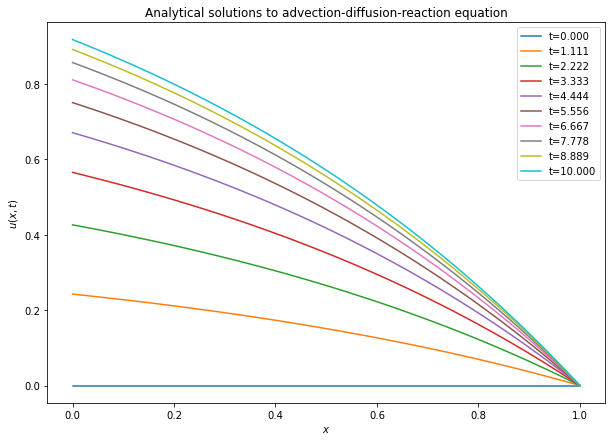

In [12]:
# Specify parameters
x = np.linspace(0,1,100)
phi0 = 1
phi1 = 0
mu0 = 0
lam = 0.5
kappa = 0.5
alpha = lam
t = np.linspace(0,10,10)

# Plot the solutions
plot_solution(x, t, phi0, phi1, mu0, kappa, lam, alpha)

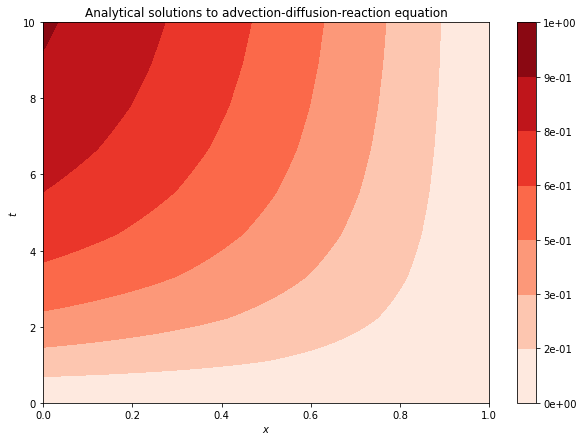

In [15]:
# Create PDE contour plot
x = np.linspace(0,1,100)
phi0 = 1
phi1 = 0
mu0 = 0
lam = 0.5
kappa = 0.5
alpha = lam
t = np.linspace(0,10,10)
xx, tt = np.meshgrid(x, t)
sol = get_solution(xx, tt, phi0, phi1, mu0, kappa, lam, alpha)
fig, ax = plt.subplots(figsize=(10,7))
cf = ax.contourf(xx, tt, sol, cmap="Reds")
cb = fig.colorbar(cf, format='%.0e', ax=ax)
ax.set_xlabel("$x$")
ax.set_ylabel("$t$")
ax.set_title("Analytical solutions to advection-diffusion-reaction equation")
plt.show()